In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://query.data.world/s/g2cflznl3dz4aqb55htfqxuiebhnag?dws=00000')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.shape

(246091, 7)

In [4]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
df.corr()

,Crop_Year,Area,Production
Crop_Year,1.000000,-0.026022,0.006989
Area,-0.026022,1.000000,0.040587
Production,0.006989,0.040587,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df=df.dropna()

<AxesSubplot:>

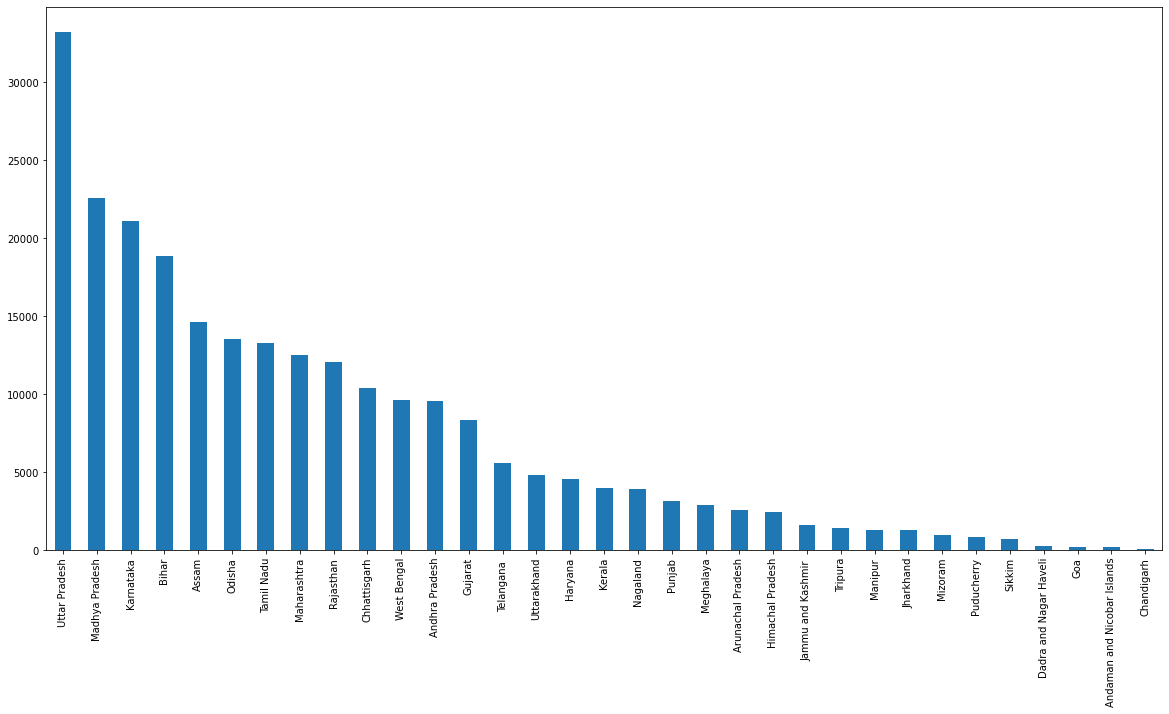

In [10]:
plt.figure(figsize=(20, 10))
df.State_Name.value_counts().plot(kind='bar')

In [11]:
'''plt.figure(figsize=(20, 10))
df.groupby(df.District_Name)['District_Name'].count().plot(kind='bar')'''

"plt.figure(figsize=(20, 10))\ndf.groupby(df.District_Name)['District_Name'].count().plot(kind='bar')"

In [12]:
print(df.Area.skew())
print(df.Production.skew())

47.76912084929028
40.74153975191237


Area


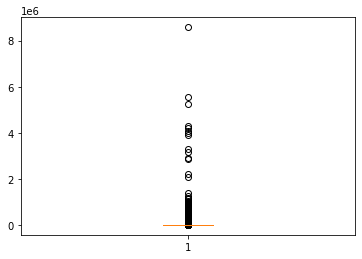

Production


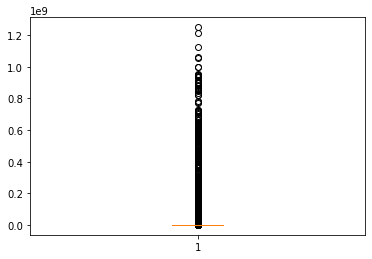

In [13]:
a=df[['Area','Production']]
for i in a:
    print(i)
    plt.boxplot(df[i])
    plt.show()
#plt.boxplot(df.Area)

In [14]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [15]:
a=df.groupby(df.Crop)[['Crop','Production']].mean()
a['Crop'] = a.index

In [16]:
a

,Production,Crop
Crop,,
Apple,0.000000,Apple
Arcanut (Processed),9641.550000,Arcanut (Processed)
Arecanut,13229.253355,Arecanut
Arhar/Tur,5261.020643,Arhar/Tur
Ash Gourd,0.000000,Ash Gourd
...,...,...
Wheat,169183.251688,Wheat
Yam,0.000000,Yam
other fibres,0.000000,other fibres


Text(0.5, 1.0, 'Number of District in each state')

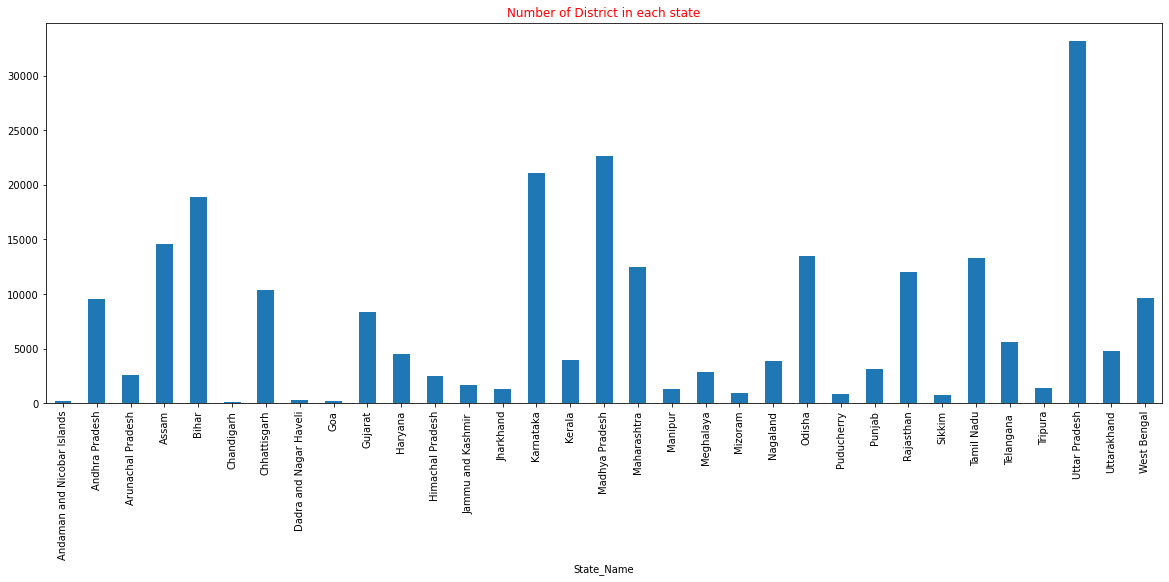

In [17]:
plt.figure(figsize=(20,7))
df.groupby('State_Name')['District_Name'].count().plot(kind='bar')
plt.title('Number of District in each state',color='Red')

Text(0.5, 1.0, 'Number of seasonal crops  ')

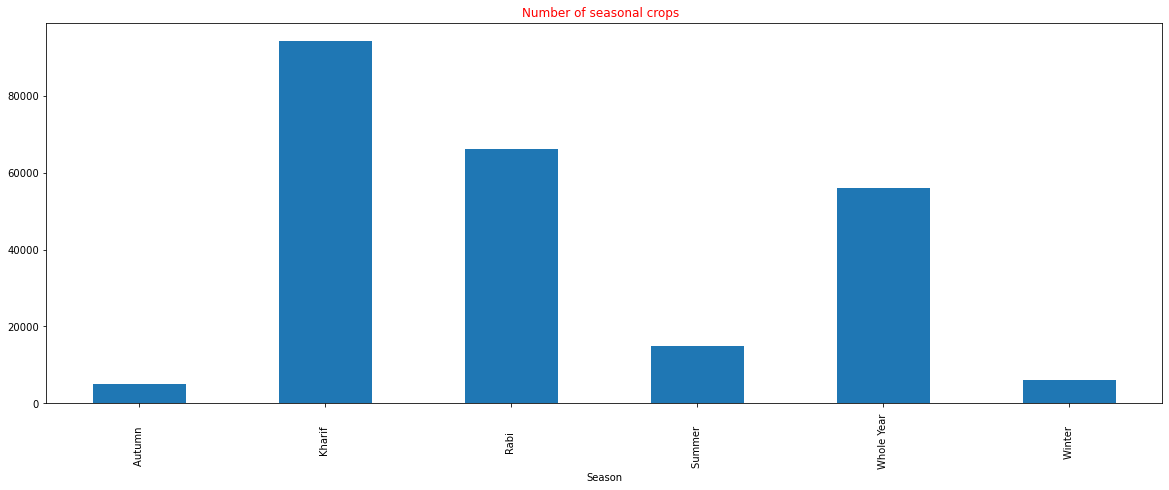

In [18]:
plt.figure(figsize=(20,7))
df.groupby('Season')['Crop'].count().plot(kind='bar')
plt.title('Number of seasonal crops  ',color='Red')

In [19]:
def get_crop_production(State_Name,Crop):
    if df['State_Name']==State_Name and df['Crop']==Crop:
        df.group

In [20]:
# Different Crops grown in each state and there production
Crop_in_each_state=df.groupby(['State_Name','Crop'])[['Production']].sum()
Crop_in_each_state['State_Name']=Crop_in_each_state.index
Crop_in_each_state.head()

Production  \
State_Name                  Crop                       
Andaman and Nicobar Islands Arecanut        48035.81   
                            Arhar/Tur         104.00   
                            Banana          97424.65   
                            Black pepper      724.50   
                            Cashewnut        1684.79   

                                                                           State_Name  
State_Name                  Crop                                                       
Andaman and Nicobar Islands Arecanut          (Andaman and Nicobar Islands, Arecanut)  
                            Arhar/Tur        (Andaman and Nicobar Islands, Arhar/Tur)  
                            Banana              (Andaman and Nicobar Islands, Banana)  
                            Black pepper  (Andaman and Nicobar Islands, Black pepper)  
                            Cashewnut        (Andaman and Nicobar Islands, Cashewnut)

In [21]:
# Agriculture area in each state
df.groupby('State_Name')['Area'].sum()

State_Name
Andaman and Nicobar Islands    3.370834e+05
Andhra Pradesh                 1.315073e+08
Arunachal Pradesh              4.364340e+06
Assam                          7.037875e+07
Bihar                          1.282695e+08
Chandigarh                     1.250200e+04
Chhattisgarh                   8.293135e+07
Dadra and Nagar Haveli         3.965150e+05
Goa                            1.205678e+06
Gujarat                        1.549261e+08
Haryana                        8.951447e+07
Himachal Pradesh               1.000342e+07
Jammu and Kashmir              9.264621e+06
Jharkhand                      9.391046e+06
Karnataka                      2.029086e+08
Kerala                         3.180225e+07
Madhya Pradesh                 3.297913e+08
Maharashtra                    3.221860e+08
Manipur                        2.007254e+06
Meghalaya                      4.035028e+06
Mizoram                        9.936402e+05
Nagaland                       6.053234e+06
Odisha               

In [22]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [23]:
# Agriculture area in each state based on district
df.groupby(['State_Name','District_Name'])['Area'].sum()

State_Name                   District_Name           
Andaman and Nicobar Islands  NICOBARS                      151169.99
                             NORTH AND MIDDLE ANDAMAN       74509.95
                             SOUTH ANDAMANS                111403.46
Andhra Pradesh               ANANTAPUR                   18471177.00
                             CHITTOOR                     6102142.00
                                                            ...     
West Bengal                  MEDINIPUR EAST              11869145.00
                             MEDINIPUR WEST              20694200.00
                             MURSHIDABAD                 24234949.00
                             NADIA                       23726486.00
                             PURULIA                      6387926.00
Name: Area, Length: 652, dtype: float64